# Advance House Prediction

## Problem Statement

<font size = '4'> Predicting the sale price of the houses based on certain features</font>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [16]:
sns.set(style= "whitegrid", font_scale=1.3)

In [2]:
import warnings 
warnings.filterwarnings('ignore')

## Loading and Analysing the Dataset

In [3]:
df = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
dftest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
dftest.shape

(1459, 80)

In [8]:
import pandas_profiling as pp

In [9]:
# pp.ProfileReport(df)

<b>

<font size ='5'>Combining train and test data</font>

In [10]:
df3 = df.drop(['SalePrice'],axis = 1)
df4 = df[['SalePrice']]

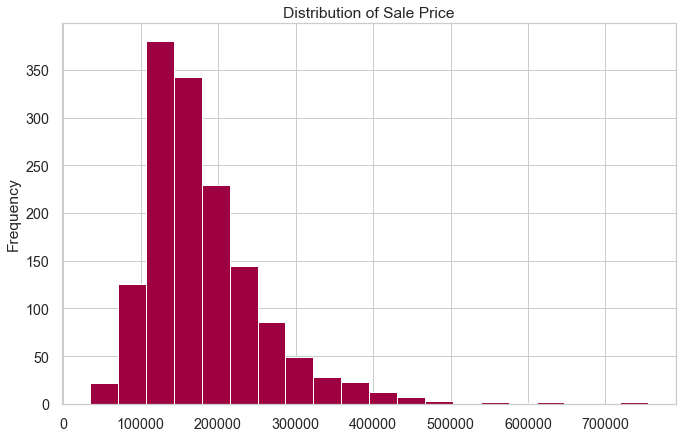

In [20]:
df4['SalePrice'].plot(kind = 'hist',bins=20,colormap = 'Spectral',title ='Distribution of Sale Price',figsize=(11, 7))

In [358]:
all_data = df3.append(dftest)
all_data.shape

(2919, 80)

In [359]:
all_data.Fence.dtype

dtype('O')

In [360]:
dict_data_types = dict(all_data.dtypes)

## Analysis of Columns with Missing values

In [361]:
t = all_data.isnull().sum()/len(all_data)*100
missing_all_data = pd.DataFrame({'Missing Value %' :t}).sort_values('Missing Value %',ascending=False)
missing_all_data['Data_Type_column'] = missing_all_data.index.map(dict_data_types)
missing_all_data.head(25)

,Missing Value %,Data_Type_column
PoolQC,99.657417,object
MiscFeature,96.402878,object
Alley,93.216855,object
Fence,80.438506,object
FireplaceQu,48.646797,object
LotFrontage,16.649538,float64
GarageYrBlt,5.447071,float64
GarageFinish,5.447071,object
GarageQual,5.447071,object
GarageCond,5.447071,object


In [362]:
list_missing_catg = missing_data[missing_data['Data_Type_column'] == 'object'].index

In [363]:
df_catg_valuecounts = pd.DataFrame( index = list_missing_catg)
df_catg_valuecounts.index.name = 'Catg columns with missing values'
df_catg_valuecounts['value_counts']= [dict(all_data[x].value_counts()) for x in list_missing_catg]
df_catg_valuecounts['Number of unique values'] = [all_data[x].nunique() for x in list_missing_catg]
df_catg_valuecounts['mode'] = df_catg_valuecounts['value_counts'].apply(lambda x : list(x.values())[0])

In [364]:
df_catg_valuecounts.head(7)

,value_counts,Number of unique values,mode
Catg columns with missing values,,,
PoolQC,"{'Ex': 4, 'Gd': 4, 'Fa': 2}",3,4
MiscFeature,"{'Shed': 95, 'Gar2': 5, 'Othr': 4, 'TenC': 1}",4,95
Alley,"{'Grvl': 120, 'Pave': 78}",2,120
Fence,"{'MnPrv': 329, 'GdPrv': 118, 'GdWo': 112, 'MnW...",4,329
FireplaceQu,"{'Gd': 744, 'TA': 592, 'Fa': 74, 'Po': 46, 'Ex...",5,744
GarageCond,"{'TA': 2654, 'Fa': 74, 'Gd': 15, 'Po': 14, 'Ex...",5,2654
GarageType,"{'Attchd': 1723, 'Detchd': 779, 'BuiltIn': 186...",6,1723


<font size = '3'> **Removing columns with more than 90 per cent missing values**</font>

In [365]:
mask_all_data = all_data.isna().sum()/len(all_data) < 0.9

In [366]:
all_data = all_data.loc[:, mask_all_data]
all_data.shape 

(2919, 77)

### Removing Columns that don't add information to the dataset

As observed from the profiling report 3SsnPorch, LowQualFinSF, MiscVal, PoolArea has more than 99% values equal to 0

In [367]:
all_data.drop(['3SsnPorch','LowQualFinSF','MiscVal','PoolArea'], axis = 1, inplace = True)

In [368]:
all_data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

<font size = '3'> We can see that all the values in the Utilities column have the same value, hence this column hold no significance for our predicition.</font>

In [369]:
all_data.drop(['Utilities'],axis = 1, inplace = True)

In [390]:
all_data.shape

(2919, 72)

### Making a list of columns based on data types

In [370]:
s_object = (all_data.dtypes == 'object')
object_cols = list(s_object[s_object].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [371]:
s_int = (all_data.dtypes == 'int64')
int_cols = list(s_int[s_int].index)
print('Intergeral Vairables:')
print(int_cols)

Intergeral Vairables:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']


In [372]:
s_float = (all_data.dtypes == 'float64')
float_cols = list(s_float[s_float].index)
print('Float Vairables:')
print(float_cols)

Float Vairables:
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [373]:
#Making a separate list of numeric columns and object columns to asssit in algorithm building

In [374]:
int_cols2 = int_cols[:]

int_cols2.extend(float_cols)

numeric_cols_train = int_cols2[:]

<b>

## Imputing Missing Values

Below is a column of categorical columns with missing values

In [375]:
df_catg_valuecounts

,value_counts,Number of unique values,mode
Catg columns with missing values,,,
PoolQC,"{'Ex': 4, 'Gd': 4, 'Fa': 2}",3,4
MiscFeature,"{'Shed': 95, 'Gar2': 5, 'Othr': 4, 'TenC': 1}",4,95
Alley,"{'Grvl': 120, 'Pave': 78}",2,120
Fence,"{'MnPrv': 329, 'GdPrv': 118, 'GdWo': 112, 'MnW...",4,329
FireplaceQu,"{'Gd': 744, 'TA': 592, 'Fa': 74, 'Po': 46, 'Ex...",5,744
GarageCond,"{'TA': 2654, 'Fa': 74, 'Gd': 15, 'Po': 14, 'Ex...",5,2654
GarageType,"{'Attchd': 1723, 'Detchd': 779, 'BuiltIn': 186...",6,1723
GarageFinish,"{'Unf': 1230, 'RFn': 811, 'Fin': 719}",3,1230
GarageQual,"{'TA': 2604, 'Fa': 124, 'Gd': 24, 'Po': 5, 'Ex...",5,2604


### Imputing null values in categorical columns

In [376]:
list_replace_mode = ['GarageCond','GarageQual','BsmtFinType2','BsmtCond','MSZoning', 'Electrical', 'PavedDrive','KitchenQual','SaleCondition',
            'LandSlope','BldgType','Condition2','Condition1','LandContour','CentralAir','Functional',
            'Heating','ExterCond','Street','Fence','SaleType','RoofMatl']

In [377]:
for col in (list_replace_mode):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

Filling the remaining categorical columns with 'None'

In [378]:
for col in object_cols:
    if col not in list_replace_mode:
        all_data[col] = all_data[col].fillna('None')

In [379]:
t = all_data.isnull().sum()/len(all_data)*100
missing_all_data = pd.DataFrame({'Missing Value %' :t}).sort_values('Missing Value %',ascending=False)
missing_all_data['Data_Type_column'] = missing_all_data.index.map(dict_data_types)
missing_all_data.head(15)

,Missing Value %,Data_Type_column
LotFrontage,16.649538,float64
GarageYrBlt,5.447071,float64
MasVnrArea,0.787941,float64
BsmtHalfBath,0.068517,float64
BsmtFullBath,0.068517,float64
GarageCars,0.034258,float64
GarageArea,0.034258,float64
TotalBsmtSF,0.034258,float64
BsmtFinSF1,0.034258,float64
BsmtFinSF2,0.034258,float64


### Imputing numeric columns

<b>

<font size ='3'>Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, we can fill in missing values by the median LotFrontage of the neighborhood</font>

In [380]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [381]:
for col in ('GarageArea', 'GarageCars','GarageYrBlt','BsmtHalfBath','BsmtFullBath'):
    all_data[col] = all_data[col].fillna(all_data[col].median())

In [382]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF'):
    all_data[col] = all_data[col].fillna(all_data[col].mean())

In [383]:
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [384]:
t = all_data.isnull().sum()/len(all_data)*100
missing_all_data = pd.DataFrame({'Missing Value %' :t}).sort_values('Missing Value %',ascending=False)
missing_all_data['Data_Type_column'] = missing_all_data.index.map(dict_data_types)
missing_all_data.head(5)

,Missing Value %,Data_Type_column
Id,0.0,int64
MSSubClass,0.0,int64
Functional,0.0,object
TotRmsAbvGrd,0.0,int64
KitchenQual,0.0,object


### Coverting some continuous columns into discreet data for easier prediction 

In [385]:
all_data['YearBuilt_group'] = pd.cut(all_data.YearBuilt, bins =[1800,1950,1975,2000,2020], labels=['Vintage','Old','Semi-Modern','Modern'])

In [386]:
all_data['YearRemoddled_group'] = pd.cut(all_data.YearRemodAdd, bins =[1800,1950,1975,2000,2020], labels=['Vintage','Very Old','Old','Recent'])

In [387]:
all_data['GrgBuilt_group'] = pd.cut(all_data.GarageYrBlt, bins =[1800,1950,1975,2000,2020], labels=['Vintage','Old','Semi-Modern','Modern'])

In [388]:
all_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'], axis = 1, inplace = True)

In [389]:
all_data.shape

(2919, 72)

<b>

<font size = '4'> **LABEL ENCODING** categorcial columns with ordinal data </font>

In [49]:
list_label_encode = ['BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2','ExterQual','ExterCond','CentralAir','GarageQual','GarageCond','GarageFinish','FireplaceQu','HeatingQC','KitchenQual']

In [50]:
from sklearn import preprocessing

In [51]:
label_encoder = preprocessing.LabelEncoder() 

In [52]:
for i in list_label_encode:
     all_data[i]= label_encoder.fit_transform(all_data[i])       

In [53]:
all_data.shape

(2919, 72)

### Getting final train and test data sets

In [54]:
dftrain_final = all_data.head(1460)

In [55]:
dftrain_final.shape

(1460, 72)

In [56]:
dftrain_final.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,YearBuilt_group,YearRemoddled_group,GrgBuilt_group
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,0,0,None,2,2008,WD,Normal,Modern,Recent,Modern
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,0,0,None,5,2007,WD,Normal,Semi-Modern,Old,Semi-Modern
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,0,0,None,9,2008,WD,Normal,Modern,Recent,Modern
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,272,0,None,2,2006,WD,Abnorml,Vintage,Very Old,Semi-Modern
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,0,0,None,12,2008,WD,Normal,Semi-Modern,Old,Semi-Modern


In [415]:
dftest_final = all_data.tail(1459)
dftest_final = dftest_final.reset_index(drop=True)

In [416]:
dftest_final.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,YearBuilt_group,YearRemoddled_group,GrgBuilt_group
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,...,0,120,MnPrv,6,2010,WD,Normal,Old,Very Old,Old
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,...,0,0,None,6,2010,WD,Normal,Old,Very Old,Old
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,...,0,0,MnPrv,3,2010,WD,Normal,Semi-Modern,Old,Semi-Modern
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,...,0,0,None,6,2010,WD,Normal,Semi-Modern,Old,Semi-Modern
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,Inside,Gtl,...,0,144,None,1,2010,WD,Normal,Semi-Modern,Old,Semi-Modern


In [417]:
dftest_final.shape

(1459, 72)

<font size ='4'>**ONE HOT ENCODING**</FONT>

In [60]:
df6 = pd.get_dummies(dftrain_final,drop_first = True)
df6.shape

(1460, 212)

In [101]:
df6.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleCondition_Partial,YearBuilt_group_Old,YearBuilt_group_Semi-Modern,YearBuilt_group_Modern,YearRemoddled_group_Very Old,YearRemoddled_group_Old,YearRemoddled_group_Recent,GrgBuilt_group_Old,GrgBuilt_group_Semi-Modern,GrgBuilt_group_Modern
0,1,60,65.0,8450,7,5,196.0,2,4,2,...,0,0,0,1,0,0,1,0,0,1
1,2,20,80.0,9600,6,8,0.0,3,4,2,...,0,0,1,0,0,1,0,0,1,0
2,3,60,68.0,11250,7,5,162.0,2,4,2,...,0,0,0,1,0,0,1,0,0,1
3,4,70,60.0,9550,7,5,0.0,3,4,4,...,0,0,0,0,1,0,0,0,1,0
4,5,60,84.0,14260,8,5,350.0,2,4,2,...,0,0,1,0,0,1,0,0,1,0


In [61]:
dftrain_final = pd.concat([df6,df4], axis = 1) 

In [62]:
dftrain_final.shape

(1460, 213)

<b>
<b>

<b>   

In [418]:
df7 = pd.get_dummies(dftest_final,drop_first = True)
df7.shape

(1459, 200)

In [64]:
dftest_final = df7.copy()

## Applying ML Models


In [65]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [66]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost.sklearn import  XGBRegressor

In [345]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate, train_test_split #For cross validation
from sklearn import metrics
from sklearn.metrics import mean_squared_error,make_scorer,r2_score
from sklearn.model_selection import learning_curve, GridSearchCV ,RandomizedSearchCV

In [289]:
x_train,x_test,y_train,y_test = train_test_split(df6,df4,test_size = 0.20)

### Making a custom class for model deployment

In [420]:
class Ml_Model():
    
    def __init__(self,model):
        self.X = x_train
        self.y = y_train
        self.X_test = x_test
        self.y_test = y_test
        self.X_full = df6
        self.target = df4
        self.model = model
        self.kf = KFold(n_splits=5,shuffle = True, random_state=None) 
    
    def fit_deploy(self):
        
        self.model.fit(self.X,self.y )
        
        self.predictions_train =  self.model.predict(self.X)
        self.predictions =  self.model.predict(self.X_test)
        print('RMSE on train set:', np.sqrt(metrics.mean_squared_error(self.y,self.predictions_train)) )
        print('R2 score on train set:', r2_score(self.y,self.predictions_train))
        print('RMSE on test set:', np.sqrt(metrics.mean_squared_error(self.y_test,self.predictions)) )
        print('R2 score on test set:', r2_score(self.y_test,self.predictions))

        
    def cross_validation(self):
        r2_scorer = make_scorer(r2_score) #This step helps us to use a custom scoring instead of default in cross validation
        results = cross_val_score(self.model, self.X_full, self.target, cv=self.kf,scoring = r2_scorer)
        print("Accuracy: %.3f%% (Std dev. %.3f%%)" % (results.mean()*100.0, results.std()*100.0))    
        
    def Randomized_Search_CV(self,param_dist):
        random_search = RandomizedSearchCV(estimator=self.model, param_distributions=param_dist, n_iter=40,cv=self.kf)
        rs = random_search.fit(self.X,self.y)
        
        self.best_model = rs.best_estimator_ 
        
        print('Best Score:', rs.best_score_)
        print('Best Parameters:', rs.best_params_)
        return rs.best_estimator_ 
    
    def generate_submission_file(self,name):
        final_prediction = self.best_model.predict(dftest_final)
        submission = pd.DataFrame(final_prediction, columns=['SalePrice'])
        submission_final = pd.concat([dftest_final,submission], axis=1)
        submission_final_DataFrame = dftest_submissionTuesdayRF[['Id','SalePrice']]
        submission_final_DataFrame.to_csv(name,index=False)
        
        return submission_final_DataFrame.head()
        

## Lasso Regression

In [421]:
# df6_L = df6.copy(deep = True)
# # df7_L = df7.copy(deep = True)

In [422]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler() 
# df6_L[list_stat_data] = scaler.fit_transform(df6_L[list_stat_data])
# df7_L[list_stat_data] = scaler.fit_transform(df7_L[list_stat_data])

In [423]:
# x_train_L ,x_test_L,y_train,y_test = train_test_split(df6_L,df4,test_size = 0.20)

In [435]:
lasso_reg = Lasso(alpha = 0.01,fit_intercept=False, tol=0.000001,
          max_iter=1000000, positive=True, normalize=True)
lasso_reg.get_params()

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': False,
 'max_iter': 1000000,
 'normalize': True,
 'positive': True,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 1e-06,
 'warm_start': False}

In [436]:
param_dist = {"alpha" : range(0,1)} #To be used in g

In [437]:
lasso_reg_model  = Ml_Model(lasso_reg)
lasso_reg_model.fit_deploy()

RMSE on train set: 30182.984465276924
R2 score on train set: 0.8590990354938534
RMSE on test set: 38185.98541123708
R2 score on test set: 0.7427671103336956


In [438]:
lasso_reg_model.cross_validation()

Accuracy: 80.704% (Std dev. 4.812%)


<font size = '3'> What scalling is doing is that it is improving the accuracy of Lasso regression but reducing the accuracy of tree based models, so we have prepared seperate scaled datasets for Lasso Regression <font>

In [428]:
predictions_lasso_reg = lasso_reg_model.predictions

In [430]:
# lasso_reg_model.Randomized_Search_CV(param_dist)

Best Score: 0.8169286798243501
Best Parameters: {'alpha': 0}


Lasso(alpha=0, copy_X=True, fit_intercept=False, max_iter=1000000,
      normalize=True, positive=True, precompute=False, random_state=None,
      selection='cyclic', tol=1e-06, warm_start=False)

In [ ]:
#  lasso_reg_model.generate_submission_file('submission_lasso')

<b>

## Random Forest

In [407]:
random_forest = RandomForestRegressor(n_estimators = 500,min_samples_split= 6 ,max_features=  10, 
                                      random_state=1, max_depth= 10, n_jobs = -1)
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 9,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 410,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [408]:
param_dist = {"max_depth": [2,4, 6, 8, 10],
             "max_features": range(2, 11),
             "min_samples_split": range(2, 11),
             "n_estimators" : range(100,1000,10)}

In [409]:
random_forest_model = Ml_Model(random_forest)
random_forest_model.fit_deploy()

RMSE on train set: 21133.7330780265
R2 score on train set: 0.9309216363296725
RMSE on test set: 31678.83973542572
R2 score on test set: 0.8229658600476899


In [410]:
random_forest_model.cross_validation()

Accuracy: 81.929% (Std dev. 4.565%)


In [411]:
random_forest_model.Randomized_Search_CV(param_dist)

Best Score: 0.835353161258199
Best Parameters: {'n_estimators': 500, 'min_samples_split': 8, 'max_features': 10, 'max_depth': 10}


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
predictions_random_forest = random_forest_model.predictions

In [439]:
random_forest_model.generate_submission_file('submission_rf')

<br>

## Gradient Boosting 

In [222]:
Gr_Boost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5) # Loss = 'huber' makes the Gboost algorithm robust to outliers.

In [223]:
Gr_Boost_model = Ml_Model(Gr_Boost)
Gr_Boost_model.fit_deploy()

RMSE on test set: 34378.14820514576
R2 score on test set: 0.8492243293665306


In [224]:
Gr_Boost_model.cross_validation()

Accuracy: 87.730% (Std dev. 9.429%)


In [225]:
predictions_Gr_Boost = Gr_Boost_model.predictions

<br>

## XG Boost

In [229]:
Xg_boost =xgb.XGBRegressor(learning_rate =0.1,n_estimators=600,max_depth=5, min_child_weight=3, 
                         gamma=0.00,min_samples_split = 10)

In [230]:
Xg_boost_model = Ml_Model(Xg_boost)
Xg_boost_model.fit_deploy()

[19:48:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE on test set: 32474.84009096707
R2 score on test set: 0.8654572338680954


In [231]:
Xg_boost_model.cross_validation()

[19:49:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:27] WARNI

In [400]:
Submission_Vaibhav_3T = pd.DataFrame(predictionsXG_sub, columns=['SalePrice'])

In [401]:
dftest_submissionTuesday = pd.concat([dftestfinal,Submission_Vaibhav_3T], axis=1)

In [402]:
dftest_submissionT = dftest_submissionTuesday[['Id','SalePrice']]

In [403]:
dftest_submissionT.to_csv('Submission_Vaibhav_Bhatia_Tuesday',index=False)

In [426]:
predictionsRF_sub = model.predict(dftestfinal)

In [427]:
Submission_Vaibhav_3F = pd.DataFrame(predictionsRF_sub, columns=['SalePrice'])

In [429]:
dftest_submissionTuesdayRF = pd.concat([dftestfinal,Submission_Vaibhav_3F], axis=1)

In [430]:
dftest_submissionF = dftest_submissionTuesdayRF[['Id','SalePrice']]

In [431]:
dftest_submissionF.to_csv('Submission_Vaibhav_Bhatia_TuesdayRF',index=False)

In [ ]:
impute_outliers(all_data,numeric_cols_test)

In [ ]:
# def impute_outliers(df,features): #  Takes a dataframe df of features and returns a list of the indices 
#                          #corresponding to the observations containing more than n outliers according to the Tukey method.
    
    
#     for col in features:
#         outlier_indices = []
#         # 1st quartile (25%)
#         Q1 = np.percentile(df[col], 25)
#         # 3rd quartile (75%)
#         Q3 = np.percentile(df[col],75)
#         # Interquartile range (IQR)
#         IQR = Q3 - Q1
        
#         # outlier step
#         outlier_step = 1.5 * IQR
#         for i in df[col]:
#                    if [( i < Q1 - outlier_step) or (i > Q3 + outlier_step )]:
#                        outlier_indices.append(i)
#         df[col].replace( outlier_indices,df[col].median)